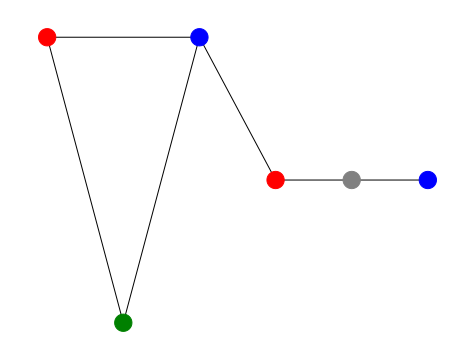

In [34]:
from JCZCircuit import *
import pyzx as zx
import networkx as nx

def generate_circuit():
    gates_list = [CZGate(0, 2), JGate(0, 1), CZGate(0, 1), CZGate(0, 2), JGate(1, 3), JGate(1, 2)]
    qubits = [0, 1, 2]
    return  gates_list, len(qubits)

# using pyzx to help draw cz j circuit, assume xphase to be j phase
def show_circuit(qubits, gates_list):
    c = zx.Circuit(qubit_amount=qubits)
    for gate in gates_list:
        if gate.type() == "J":
            c.add_gate("XPhase", gate.qubit, phase = gate.phase / 4)
        else:
            c.add_gate("CZ", gate.qubit1, gate.qubit2)
    zx.draw(c)
    return

def turn_to_graph(gates_list, qubits):
    node_index = 0
    node_pos = []
    pos_x = 0
    pre_nodes = {}
    for q in range(qubits):
        pre_nodes[q] = -1

    graph = nx.Graph()
    for gate in gates_list:
        if gate.type() == "J":
            if pre_nodes[gate.qubit] == -1:
                graph.add_node(node_index, node_val = "In")
                graph.add_node(node_index + 1, node_val = "Out")
                graph.add_edge(node_index, node_index + 1)
                qubit = gate.qubit
                node_pos.append((pos_x, - qubit))
                node_pos.append((pos_x + 1, - qubit))
                pre_nodes[qubit] = node_index + 1
                pos_x += 2
                node_index += 2
            else:
                pre_node = pre_nodes[gate.qubit]
                if graph.nodes[pre_node]['node_val'] == "Out":
                    graph.nodes[pre_node]['node_val'] = "Aux"
                else:
                    graph.nodes[pre_node]['node_val'] = "In"
                graph.add_node(node_index, node_val = "Out")
                graph.add_edge(pre_node, node_index)
                qubit = gate.qubit
                node_pos.append((pos_x, - qubit))
                pre_nodes[qubit] = node_index
                pos_x += 1
                node_index += 1
        else:
            qubit1 = gate.qubit1
            qubit2 = gate.qubit2
            if pre_nodes[qubit1] == -1:
                graph.add_node(node_index, node_val = "IO")
                node_pos.append((pos_x, - qubit1))
                pre_nodes[qubit1] = node_index
                node_q1 = node_index
                pos_x += 1
                node_index += 1
            else:
                node_q1 = pre_nodes[qubit1]
            
            if pre_nodes[qubit2] == -1:
                graph.add_node(node_index, node_val = "IO")
                node_pos.append((pos_x, - qubit2))
                pre_nodes[qubit2] = node_index
                node_q2 = node_index
                pos_x += 1
                node_index += 1
            else:
                node_q2 = pre_nodes[qubit2]
            graph.add_edge(node_q1, node_q2)
    return graph, node_pos

def main():
    gates_list, qubits = generate_circuit()
    show_circuit(qubits, gates_list)
    graph, node_pos = turn_to_graph(gates_list, qubits)
    colors = []
    for nnode in graph.nodes():
        if graph.nodes[nnode]['node_val'] == "Out":
            colors.append('blue')
        elif graph.nodes[nnode]['node_val'] == "In":
            colors.append('red')
        elif graph.nodes[nnode]['node_val'] == "IO":
            colors.append('green')
        else:
            colors.append('gray')
    labels = nx.get_node_attributes(graph, 'node_val')
    nx.draw(graph, pos = node_pos, node_color = colors, labels=labels)
    return

if __name__ == '__main__':
    main()